# Supervised classification for driver types with aggregation analysis.

In [ ]:
import pandas as pd

In [2]:
fcd_df = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/fcd-output.xlsx")
emission_df = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/emission-output.xlsx")
features = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/features.xlsx")

In [28]:
features

,Unnamed: 0,time,id,x,y,angle,type,speed,pos,lane,acceleration,lane_id,lane_length,lane_change,vehicle_density,avg_speed_nearby_vehicles
0,0,0.0,f_0.0,-38.09,-4.80,90.00,SportsCarDriver,0.00,61.91,E0_0,0.00,E0_0,88.22,0,0.011335,0.00
1,1,0.1,f_0.0,-38.08,-4.80,90.00,SportsCarDriver,0.03,61.92,E0_0,0.34,E0_0,88.22,0,0.011335,0.03
2,2,0.2,f_0.0,-38.07,-4.80,90.00,SportsCarDriver,0.10,61.93,E0_0,0.64,E0_0,88.22,0,0.011335,0.10
3,3,0.3,f_0.0,-38.05,-4.80,90.00,SportsCarDriver,0.21,61.95,E0_0,1.12,E0_0,88.22,0,0.011335,0.21
4,4,0.4,f_0.0,-38.01,-4.80,90.00,SportsCarDriver,0.40,61.99,E0_0,1.86,E0_0,88.22,0,0.011335,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398475,398475,444.3,f_5.99,87.30,10.02,294.06,CautiousDriver,16.62,5.14,:J2_0_0,-0.68,:J2_0_0,9.06,0,0.110375,16.62
398476,398476,444.4,f_5.99,85.91,10.87,300.53,CautiousDriver,16.55,6.79,:J2_0_0,-0.70,:J2_0_0,9.06,0,0.110375,16.55
398477,398477,444.5,f_5.99,84.29,11.17,296.05,CautiousDriver,16.48,8.44,:J2_0_0,-0.73,:J2_0_0,9.06,1,0.110375,16.48
398478,398478,444.6,f_5.99,82.66,11.27,285.32,CautiousDriver,16.41,1.02,E8_0,-0.71,E8_0,126.49,0,0.015812,16.01


In [29]:
# Merging the data using 'id' and 'type'
merged_data = pd.merge(fcd_df,emission_df, on=['time','id','type'])

In [30]:
# Merging the data using 'id' and 'type'
merged_data = pd.merge(merged_data,features, on=['time','id','type']) 

In [31]:
merged_data

,time,id,x_x,y_x,angle_x,type,speed_x,pos_x,lane_x,slope,...,angle,speed,pos,lane,acceleration_y,lane_id,lane_length,lane_change,vehicle_density,avg_speed_nearby_vehicles
0,0.0,f_0.0,-38.09,-4.80,90.00,SportsCarDriver,0.00,61.91,E0_0,0,...,90.00,0.00,61.91,E0_0,0.00,E0_0,88.22,0,0.011335,0.000000
1,0.0,f_1.0,-57.03,-37.67,33.37,CautiousDriver,0.00,75.68,E5_0,0,...,33.37,0.00,75.68,E5_0,0.00,E5_0,134.80,0,0.007418,0.000000
2,0.0,f_2.0,-33.33,-1.60,90.00,ElderlyDriver,0.00,66.67,E0_1,0,...,90.00,0.00,66.67,E0_1,0.00,E0_1,88.22,0,0.011335,0.000000
3,0.0,f_3.0,357.14,4.80,270.00,AggressiveLanechangingdriver,0.00,42.86,-E2_0,0,...,270.00,0.00,42.86,-E2_0,0.00,-E2_0,93.62,0,0.010681,0.000000
4,0.0,f_4.0,241.15,21.32,215.86,AggressiveLanechangingdriver,0.00,98.24,E7_0,0,...,215.86,0.00,98.24,E7_0,0.00,E7_0,111.90,0,0.008937,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398475,999.9,f_5.222,111.69,1.60,270.00,SportsCarDriver,0.00,102.38,-E1_2,0,...,270.00,0.00,102.38,-E1_2,0.00,-E1_2,122.17,1,0.040927,9.716000
398476,999.9,f_5.223,245.35,4.80,270.00,InexperiencedDriver,12.57,55.00,-E3_1,0,...,270.00,12.57,55.00,-E3_1,0.80,-E3_1,68.44,1,0.014611,12.570000
398477,999.9,f_5.224,158.14,4.80,270.00,SportsCarDriver,26.32,55.93,-E1_1,0,...,270.00,26.32,55.93,-E1_1,-3.12,-E1_1,122.17,1,0.057297,5.984286
398478,999.9,f_5.225,335.19,1.60,270.00,ElderlyDriver,8.05,64.81,-E2_1,0,...,270.00,8.05,64.81,-E2_1,1.15,-E2_1,93.62,1,0.010681,8.050000


In [32]:
final = merged_data.drop(columns=['slope','eclass','route','waiting','lane_y','pos_y','speed_y','angle_y','x_y','y_y','Unnamed: 0','x','y','lane_id','lane', 'HC','CO2','PMx', 'NOx','electricity','lane_x','speed','pos','acceleration_y'])

In [33]:
final

,time,id,x_x,y_x,angle_x,type,speed_x,pos_x,acceleration_x,CO,fuel,noise,angle,lane_length,lane_change,vehicle_density,avg_speed_nearby_vehicles
0,0.0,f_0.0,-38.09,-4.80,90.00,SportsCarDriver,0.00,61.91,0.00,164.78,1.13,55.94,90.00,88.22,0,0.011335,0.000000
1,0.0,f_1.0,-57.03,-37.67,33.37,CautiousDriver,0.00,75.68,0.00,164.78,1.13,55.94,33.37,134.80,0,0.007418,0.000000
2,0.0,f_2.0,-33.33,-1.60,90.00,ElderlyDriver,0.00,66.67,0.00,164.78,1.13,55.94,90.00,88.22,0,0.011335,0.000000
3,0.0,f_3.0,357.14,4.80,270.00,AggressiveLanechangingdriver,0.00,42.86,0.00,164.78,1.13,55.94,270.00,93.62,0,0.010681,0.000000
4,0.0,f_4.0,241.15,21.32,215.86,AggressiveLanechangingdriver,0.00,98.24,0.00,164.78,1.13,55.94,215.86,111.90,0,0.008937,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398475,999.9,f_5.222,111.69,1.60,270.00,SportsCarDriver,0.00,102.38,0.00,164.78,1.13,55.94,270.00,122.17,1,0.040927,9.716000
398476,999.9,f_5.223,245.35,4.80,270.00,InexperiencedDriver,12.57,55.00,0.80,54.87,2.09,65.98,270.00,68.44,1,0.014611,12.570000
398477,999.9,f_5.224,158.14,4.80,270.00,SportsCarDriver,26.32,55.93,-3.12,0.00,0.00,70.26,270.00,122.17,1,0.057297,5.984286
398478,999.9,f_5.225,335.19,1.60,270.00,ElderlyDriver,8.05,64.81,1.15,88.12,1.93,64.65,270.00,93.62,1,0.010681,8.050000


In [34]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
final['type'] = label_encoder.fit_transform(final['type'])
final['id'] = label_encoder.fit_transform(final['id'])

In [35]:
final.corr()

,time,id,x_x,y_x,angle_x,type,speed_x,pos_x,acceleration_x,CO,fuel,noise,angle,lane_length,lane_change,vehicle_density,avg_speed_nearby_vehicles
time,1.000000,-0.027918,-0.011356,0.005042,0.014711,-0.014541,-0.047372,0.032194,-0.021207,-0.007374,-0.032181,-0.060527,0.014711,0.015000,-0.003851,-0.004640,-0.050949
id,-0.027918,1.000000,0.327327,0.409731,0.838318,0.065246,-0.203942,0.066977,-0.047929,0.047427,-0.061821,-0.173792,0.838318,0.036952,-0.017214,0.017209,-0.214982
x_x,-0.011356,0.327327,1.000000,0.386571,0.391870,0.017162,0.076041,-0.114310,-0.026528,-0.039143,-0.019635,0.054022,0.391870,-0.226934,0.012718,0.014581,0.067308
y_x,0.005042,0.409731,0.386571,1.000000,0.518102,0.037787,0.001827,0.007374,-0.005661,-0.006916,0.002178,0.003849,0.518102,-0.112893,0.002876,-0.016119,-0.013411
angle_x,0.014711,0.838318,0.391870,0.518102,1.000000,0.061652,-0.078379,-0.005626,-0.045198,0.017719,-0.014780,-0.077087,1.000000,-0.090701,0.000320,0.016353,-0.087862
type,-0.014541,0.065246,0.017162,0.037787,0.061652,1.000000,0.039832,0.013670,0.006287,0.085217,0.090033,0.085638,0.061652,0.000577,0.004922,-0.004523,0.029756
speed_x,-0.047372,-0.203942,0.076041,0.001827,-0.078379,0.039832,1.000000,-0.147737,-0.152472,-0.309797,0.269757,0.649122,-0.078379,-0.146480,0.084343,-0.033159,0.929810
pos_x,0.032194,0.066977,-0.114310,0.007374,-0.005626,0.013670,-0.147737,1.000000,-0.137458,-0.002299,-0.111715,-0.210549,-0.005626,0.508238,0.010770,-0.264876,-0.174426
acceleration_x,-0.021207,-0.047929,-0.026528,-0.005661,-0.045198,0.006287,-0.152472,-0.137458,1.000000,0.660221,0.667733,0.542191,-0.045198,-0.046121,-0.019591,0.003719,-0.152357
CO,-0.007374,0.047427,-0.039143,-0.006916,0.017719,0.085217,-0.309797,-0.002299,0.660221,1.000000,0.758814,0.328897,0.017719,0.029082,-0.036084,-0.007503,-0.300232


# Merging Mean,Variance and Standard Deviation data

In [36]:
import pandas as pd

# Assuming 'df' contains the provided DataFrame

# Group by 'id' and 'time' and calculate the mean, std, and var for each column
mean_values = final.groupby(['id', 'type']).mean().reset_index()
std_values = final.groupby(['id', 'type']).std().reset_index()
var_values = final.groupby(['id', 'type']).var().reset_index()

# Merge the mean, std, and var DataFrames
result = pd.merge(mean_values, std_values, on=['id', 'type'], suffixes=('_mean', '_std'))
result = pd.merge(result, var_values, on=['id', 'type'], suffixes=('', '_var'))

# Display the resulting DataFrame with mean, std, and var for each column
print(result)


        id  type  time_mean    x_x_mean   y_x_mean  angle_x_mean  \
0        0     4       7.50  107.577550  -4.800000     90.000000   
1        1     2      16.00   87.693980  -3.451505     90.000000   
2        2     4      37.95  140.579252  -4.201869     90.000000   
3        3     1     364.15   74.287206  -4.800000     90.000000   
4        4     2     368.30   85.125269  -1.600000     90.000000   
...    ...   ...        ...         ...        ...           ...   
1266  1266     3     417.75  232.513088   7.357618    275.632353   
1267  1267     3     421.75  227.060992   5.506031    271.744313   
1268  1268     1     432.75  248.253301  10.328058    277.318204   
1269  1269     2     430.50  206.437138  10.499731    278.446229   
1270  1270     1     432.35  250.277097   5.909798    270.869234   

      speed_x_mean  pos_x_mean  acceleration_x_mean     CO_mean  ...  \
0        23.237682   47.523974             1.463444  240.779139  ...   
1        12.496923   47.752943         

In [37]:
result.fillna(value=0, inplace=True)  # Replaces NaN with 0

In [38]:
result.columns

Index(['id', 'type', 'time_mean', 'x_x_mean', 'y_x_mean', 'angle_x_mean',
       'speed_x_mean', 'pos_x_mean', 'acceleration_x_mean', 'CO_mean',
       'fuel_mean', 'noise_mean', 'angle_mean', 'lane_length_mean',
       'lane_change_mean', 'vehicle_density_mean',
       'avg_speed_nearby_vehicles_mean', 'time_std', 'x_x_std', 'y_x_std',
       'angle_x_std', 'speed_x_std', 'pos_x_std', 'acceleration_x_std',
       'CO_std', 'fuel_std', 'noise_std', 'angle_std', 'lane_length_std',
       'lane_change_std', 'vehicle_density_std',
       'avg_speed_nearby_vehicles_std', 'time', 'x_x', 'y_x', 'angle_x',
       'speed_x', 'pos_x', 'acceleration_x', 'CO', 'fuel', 'noise', 'angle',
       'lane_length', 'lane_change', 'vehicle_density',
       'avg_speed_nearby_vehicles'],
      dtype='object')

In [52]:
result['type'].value_counts()

type
3    406
2    265
4    249
1    239
0    112
Name: count, dtype: int64

# Random Forest(ensemble Method)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing the data

# Features (X) and target variable (y)
X = result.drop(['type','id'],axis=1)  # Features
y = result['type']  # Target variable

# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any other classifier of your choice)
clf_rand = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the classifier on the training data
clf_rand.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rand.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7450980392156863


# KNN-Model

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



# Features (X) and target variable (y)
X = result.drop(['type','id'], axis=1)  # Features
y = result['type']  # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier
k = 5  # You can change this value as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the k-NN model: {accuracy:.2f}')


Accuracy of the k-NN model: 0.45


# DNN Model

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

# Assuming 'fcd_df' is your DataFrame containing the data

# Features (X) and target variable (y)
X = result.drop(['type','id'], axis=1)  # Features
y = result['type']  # Target variable

# Convert y to categorical (one-hot encoded)
y = to_categorical(y)
num_classes = 5
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Deep Neural Network model with L2 regularization and dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 3.7146 - accuracy: 0.2549 - val_loss: 3.2458 - val_accuracy: 0.4667
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 3.2216 - accuracy: 0.3947 - val_loss: 2.9941 - val_accuracy: 0.4902
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 2.9504 - accuracy: 0.4341 - val_loss: 2.7425 - val_accuracy: 0.4902
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 2.7408 - accuracy: 0.4675 - val_loss: 2.5296 - val_accuracy: 0.4902
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 2.5788 - accuracy: 0.4528 - val_loss: 2.3764 - val_accuracy: 0.4902
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 2.4209 - accuracy: 0.4587 - val_loss: 2.2328 - val_accuracy: 0.4902
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2669 - accuracy: 0.4547 - val_loss: 2.1011 - val_accuracy: 0.4902
Epoch 8/10
32/32 [==

# Gaussian Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'fcd_df' is your DataFrame containing the data

# Features (X) and target variable (y)
X = result.drop(['type','id'], axis=1)  # Features
y = result['type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler and fit-transform the training data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6039215686274509


# Best Model Performance on unseen data(New Simulation data)

In [19]:
fcd_df_New = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/fcd-output(New).xlsx")
emission_df_New = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/emission-output(New).xlsx")
features_New = pd.read_excel("C:/Users/saiko/OneDrive/Desktop/699/Task-7/features_New.xlsx")

In [43]:
# Merging the data using 'id' and 'type'
merged_data_New = pd.merge(fcd_df_New,emission_df_New, on=['time','id','type'])

In [44]:
# Merging the data using 'id' and 'type'
merged_data_New = pd.merge(merged_data_New,features_New, on=['time','id','type']) 

# Count Plot of Vehicle Types

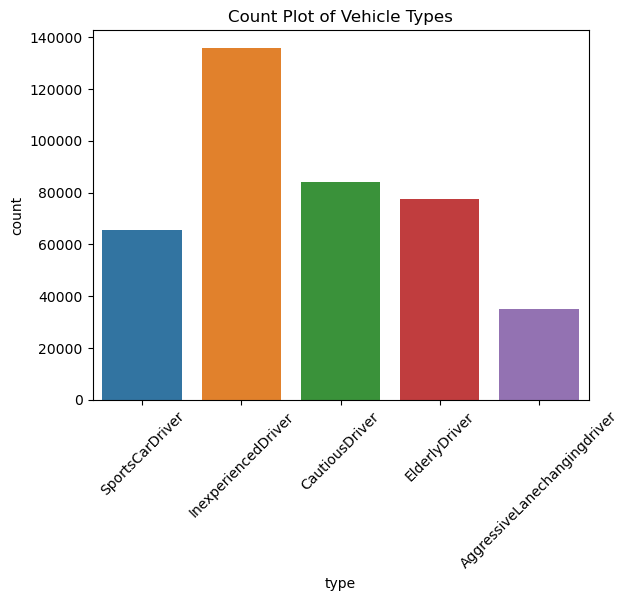

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of creating a count plot for the 'type' column
sns.countplot(data=merged_data_New, x='type')
plt.title('Count Plot of Vehicle Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


In [45]:
final_New = merged_data_New.drop(columns=['slope','eclass','route','waiting','lane_y','pos_y','speed_y','angle_y','x_y','y_y','Unnamed: 0','x','y','lane_id','lane', 'HC','CO2','PMx', 'NOx','electricity','lane_x','speed','pos','acceleration_y'])

In [46]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
final_New['type'] = label_encoder.fit_transform(final_New['type'])
final_New['id'] = label_encoder.fit_transform(final_New['id'])

In [47]:
import pandas as pd

# Assuming 'df' contains the provided DataFrame

# Group by 'id' and 'time' and calculate the mean, std, and var for each column
mean_values = final_New.groupby(['id', 'type']).mean().reset_index()
std_values = final_New.groupby(['id', 'type']).std().reset_index()
var_values = final_New.groupby(['id', 'type']).var().reset_index()

# Merge the mean, std, and var DataFrames
result_New = pd.merge(mean_values, std_values, on=['id', 'type'], suffixes=('_mean', '_std'))
result_New = pd.merge(result_New, var_values, on=['id', 'type'], suffixes=('', '_var'))

# Display the resulting DataFrame with mean, std, and var for each column
print(result_New)


        id  type  time_mean    x_x_mean   y_x_mean  angle_x_mean  \
0        0     4       9.00  142.739171  -4.800000     90.000000   
1        1     3      17.95   52.987160  -3.209467     90.000000   
2        2     1      51.55  108.559641  -3.774586     90.000000   
3        3     2     365.00   80.617143  -4.800000     90.000000   
4        4     2     376.70   54.816736  -1.600000     90.000000   
...    ...   ...        ...         ...        ...           ...   
1267  1267     2     416.55  270.367073   5.593496    270.000000   
1268  1268     1     424.45  256.381689   4.590338    271.160473   
1269  1269     2     436.25  216.555180  11.507335    278.466437   
1270  1270     2     436.35  225.095988   6.357685    276.368056   
1271  1271     3     434.35  229.291532   6.304073    271.350685   

      speed_x_mean  pos_x_mean  acceleration_x_mean     CO_mean  ...  \
0        20.700552   44.590884             1.043204  145.199448  ...   
1        12.304763   37.877456         

In [48]:
result_New.fillna(value=0, inplace=True)  # Replaces NaN with 0

In [53]:
result_New['type'].value_counts()

type
3    384
4    260
1    244
2    239
0    145
Name: count, dtype: int64

In [49]:
import pandas as pd

# Assuming df is your DataFrame
# Shuffle the rows using sample() function
shuffled_df = result_New.sample(frac=1, random_state=42)  # frac=1 shuffles the whole DataFrame, random_state for reproducibility

# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

# Random Forest Evaluation

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing the data

# Features (X) and target variable (y)
X = shuffled_df.drop(['type','id'], axis=1)  # Features
y = shuffled_df['type']  # Target variable



# Predict on the test data
y_pred = clf_rand.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7130503144654088
